<a href="https://colab.research.google.com/github/Syauqi366/SyauqiRabbani_MachineLearning/blob/main/jerukdanapel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = "/content/gdrive/MyDrive/Praktikum_ml/Praktikum7"

In [ ]:
import pandas as pd

df = pd.read_csv(path+f"/data/apples_and_oranges.csv")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  40 non-null     int64  
 1   Size    40 non-null     float64
 2   Class   40 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.1+ KB


,Weight,Size
count,40.000000,40.000000
mean,70.200000,4.922750
std,3.039906,0.590063
min,65.000000,4.010000
25%,68.000000,4.360000
50%,70.000000,4.930000
75%,73.000000,5.472500
max,75.000000,5.850000


In [ ]:
df["Class"].unique()

array(['orange', 'apple'], dtype=object)

In [ ]:
df["Class"].value_counts()

,count
Class,
orange,20
apple,20


In [ ]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

X = df[['Weight', 'Size']]
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.2, random_state=42, stratify=y )

In [ ]:
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred = model.predict(X_test)

print("\nAkurasi Model:")
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi Model:
Akurasi: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



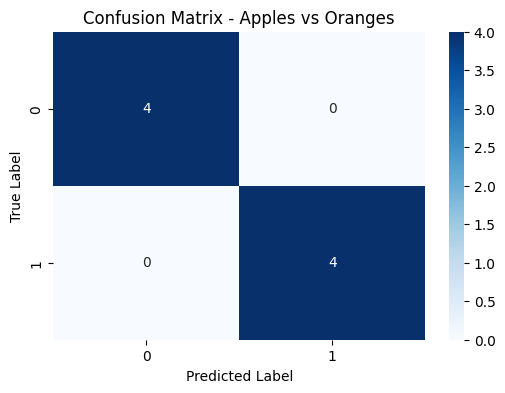

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Apples vs Oranges')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

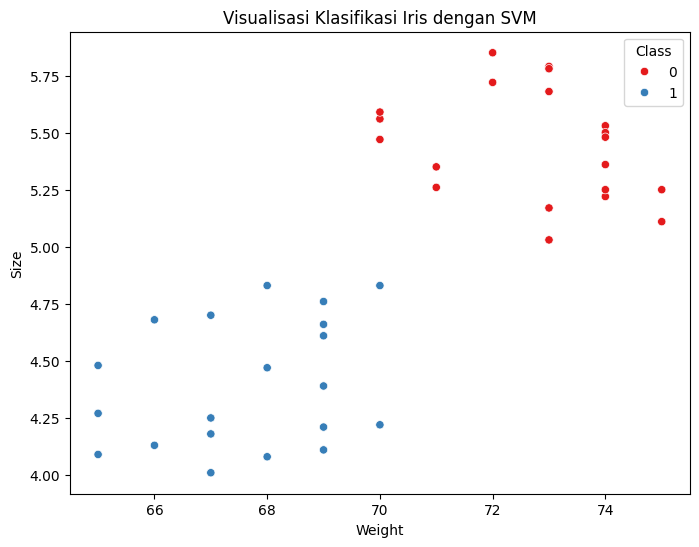

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['Weight'], y=df['Size'], hue=df['Class'], palette='Set1')
plt.title('Visualisasi Klasifikasi Iris dengan SVM')
plt.xlabel('Weight')
plt.ylabel('Size')
plt.show()

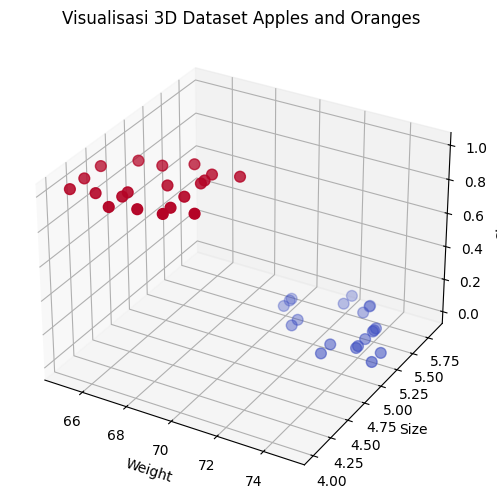

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Weight'], df['Size'], df['Class'], c=df['Class'], cmap='coolwarm', s=60)
ax.set_xlabel('Weight')
ax.set_ylabel('Size')
ax.set_zlabel('Class')
ax.set_title('Visualisasi 3D Dataset Apples and Oranges')
plt.show()
